# Projeto Final - Machine Learning
- Luca Melão
- Matheus Kwon

## 1. Contexto

Diante de uma maior relevância da economia compartilhada e crescimento de empresas situadas nesse ambiente, a locação de imóveis foi se tornando mais inovadora ao longo dos últimos ano. O Airbnb é um exemplo de empresa situada nesse escopo de serviço, que promove um serviço de locação de fácil acesso e rápido, muitas vezes próximo do período desejado. Assim, buscamos compreender como variados fatores impactam na formação de preços das locações e também nos reviews das mesmas, sendo esse o objetivo de análise do projeto.

O dataset escolhido tem como fonte as informações abertas do Airbnb no estado de Nova Iorque, e foi extraída diretamente do Kaggle. Desde 2008, hóspedes e anfitriões usam o Airbnb para viajar de uma forma mais exclusiva e personalizada. Como parte da iniciativa Airbnb Inside, este conjunto de dados descreve a atividade de anúncios de homestays na cidade de Nova York. Contendo informações relativas à localização, preço por noite, reviews, disponibilidade, ano de construção, etc.




Identificamos 2 grandes alavancas de valor que a companhia consegue endereçar a partir das análises que serão feitas aqui:


### A) Marketing

Utilizando-se do estudo, a plataforma consegue identificar os principais pontos de atração para os consumidores, entendendo quais são as características dos imóveis com maior taxa de sucesso. Desse modo, é possível definir as melhores práticas para serem utilizadas e a partir destes drivers e também criar novas features para seus usuários - como novos filtros de número de reviews, regras da casa, ano de construção - para que os consumidores tenham melhores experiências na hora de alugar uma residência e aumentem a taxa de sucesso (realizar o aluguel do imóvel) de um usuário que faz uso da plataforma.

### B) Relação com clientes

Ademais, a segunda alavanca de valor que o Airbnb pode ter é na melhora da sua relação com os usuários que oferecem seus imóveis para locação. A plataforma pode apresentar novas dicas e formatos de exposição da residência, para que os principais usuários tenham uma maior taxa de ocupação e atraiam mais clientes. Desse modo, o *Airbnb* consegue elevar suas vendas e melhorar a relação com os seus principais locatários.

O conjunto de dados se divide em diversas informações relevantes para análise exploratória. Com relação ao imóvel, as variáveis apresentadas são o tipo do domicílio, bairro de localização, ano de construção, política de cancelamento; já em relação as variáveis numéricas, destacam-se o preço da locação, a taxa de serviço, o número mínimo de noites permitidas, número de avaliações, nota de avaliação e disponibilidade durante o ano.


As informações de cada variável da base de dados pode ser encontrada abaixo:

- `id`: Corresponde a **identificação** do imóvel;



- `NAME`: Corresponde ao **nome de identificação** do imóvel;



- `host id`: Corresponde ao **número de identificação** do anfitrião;



- `host_identity_verified`: Indica se a identidade do anfitrião foi **confirmada**, é representada por uma **variável categórica**:
        - 1, se confirmada
        - 0, se não confirmada



- `host name`: **Nome** do anfitrião;



- `neighbourhood group`: **Bairro** em que o imóvel está localizado:
      - `T.Brooklyn` se na região do Brooklyn;
      - `T.Manhattan` se na região de Manhattan;
      - `T.Queens` se na região do Queens;
      - `T.Bronx` se na região do Bronx;
      - `T.Staten Island` se na região da Ilha de Staten.




- `neighbourhood`: **Vizinhança** em que o imóvel se localiza;



- `lat`: **Latitude** da localização do imóvel;



- `long`: **Longitude** da localização do imóvel;



- `room_type`: **Tipo de quarto ou imóvel** que será alugado:
      - `room_type`: Tipo de quarto ou imóvel que será alugado
      - `T.Hotel room` se em hotel;
      - `T.Private room` se quarto privativo;
      - `T.Shared room` se quarto compartilhado.


- `country`: **País** em que o imóvel se encontra;



- `country code`: **Código de país** em que o imóvel se encontra;



- `instant_bookable`: Indica se é possível locar o imóvel **instantaneamente**:
         
        - 1, se sim
        - 0, se não for possível
        
- `cancellation_policy`: Indica a **política de cancelamento** da locação do imóvel;



- `service fee`: **Taxa de serviço** que é cobrado na locação do imóvel;



- `Construction year`: **Ano de construção** do imóvel;



- `price`: **Preço** de locação do imóvel;



- `minimum nights`: Estadia mínima que é solicitada para locação (em dias);



- `number of reviews`: **Número de avaliações** do imóvel;



- `last review`: **Data da última avaliação** do imóvel;



- `reviews per month`: **Número de avaliações** média por mês;



- `review rate number`: **Nota** de avaliação;



- `calculated host listings count`: **Número de listagens** do anfitrião;



- `avaliability 365`: **Disponibilidade** do imóvel durante o ano (em dias);



- `house_rules`: **Regras** do imóvel.


- `licence`: Não há informação o suficiente sobre.

----

# 1. Imports necessários

## 1.1. Importando o Dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns   
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## 1.2. Importando o Dataset

In [2]:
filepath = 'data/'
filename = 'AB_NYC_2019.csv'

if filename in  os.listdir(filepath):
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo na pasta "./data" ?')

Encontrei o arquivo AB_NYC_2019.csv, tudo certo para prosseguir!


In [3]:
# Lendo o arquivo
db_original = pd.read_csv(filepath + filename)

# Trabalharemos em uma cópia do dataset
db = db_original.copy()

----

# 2. Informações Gerais

In [4]:
size = db.shape
linhas = size[0]
colunas = size[1]
print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 48895
Colunas: 16


In [5]:
db.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
display(db.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
db.id.describe()

count    4.889500e+04
mean     1.901714e+07
std      1.098311e+07
min      2.539000e+03
25%      9.471945e+06
50%      1.967728e+07
75%      2.915218e+07
max      3.648724e+07
Name: id, dtype: float64

----

# 3. Tratamento dos dados

## 3.1. Conversão dos dtypes
Algumas das features, e também o nosso target, estão no formato object, devemos então realizar a conversão para float, string ou demais dtypes.

In [8]:
# Convert price
db['price'] = db['price'].astype(str).apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

# Convert NAME
db['name'] = db['name'].astype(str)

# Convert host name
db['host_name'] = db['host_name'].astype(str)

# Convert neighbourhood group
db['neighbourhood_group'] = db['neighbourhood_group'].astype(str)

# Convert neighbourhood 
db['neighbourhood'] = db['neighbourhood'].astype(str)

# Convert room type
db['room_type'] = db['room_type'].astype(str)

# Convert the date from the last review
db['last_review'] = pd.to_datetime(db['last_review'])

In [9]:
# Validando a conversão definindo o nosso target
target = db['price']
target.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

db_cat = db[['neighbourhood_group', 'room_type']]
db_cat_1hot = encoder.fit_transform(db_cat)
encoder.get_feature_names_out()

array(['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'], dtype=object)

In [11]:
db_cat_1hot_renamed = pd.DataFrame(db_cat_1hot).rename(columns={
    0: 'Bronx',
    1: 'Brooklyn',
    2: 'Manhattan',
    3: 'Queens',
    4: 'Staten_Island',
    5: 'Entire_home/apt',
    6: 'Private_room',
    7: 'Shared_room'
})

db_cat_1hot_renamed.head(5)

,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Entire_home/apt,Private_room,Shared_room
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
db_cat = db.join(db_cat_1hot_renamed)
db_cat.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Entire_home/apt,Private_room,Shared_room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,...,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,...,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,...,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,...,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,...,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## 3.2. Eliminando duplicatas

In [13]:
db_cat.drop_duplicates(keep='first', inplace=True)

## 3.3. Lidando com valores NaN

Com os dados no formato desejado, podemos começar a tratá-los.

In [14]:
# Quantos nulos tenho em cada coluna?
dadosnulls = db_cat.isnull().sum()
dadosnulls[dadosnulls.values > 0]

last_review          10052
reviews_per_month    10052
dtype: int64

In [15]:
# Percentualmente
display(round((dadosnulls[dadosnulls.values>0]/linhas)*100, 2).sort_values(ascending=0))

last_review          20.56
reviews_per_month    20.56
dtype: float64

In [16]:
db_cat.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten_Island', 'Entire_home/apt', 'Private_room', 'Shared_room'],
      dtype='object')

In [17]:
# Eliminando as colunas com mais de 50% dos valores nulos, ou colunas que não agregam valor para a análise
db_dropped = db_cat.drop(['id', 'host_id', 'host_name', 'last_review'], axis = 1)

In [18]:
# Nas colunas quantitativas devemos preencher os nan com as medianas
quant_features = ['price','minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count']

for feature in quant_features:
    db_dropped[feature].fillna(value = db_dropped[feature].median(), inplace = True)

In [19]:
db_dropped.fillna({'reviews_per_month':0}, inplace=True)

In [20]:
db_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  float64
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  Bronx                           

## Outliers

In [21]:
np.sqrt(len(db_dropped))

221.12213819516128

<AxesSubplot: ylabel='Frequency'>

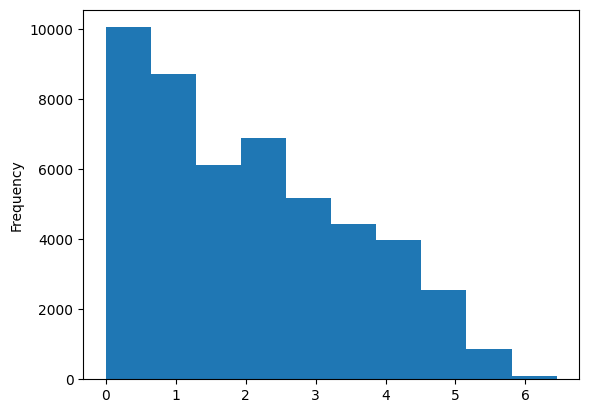

In [22]:
db_dropped['number_of_reviews'].apply(lambda x: np.log(x+1)).plot.hist()

<AxesSubplot: >

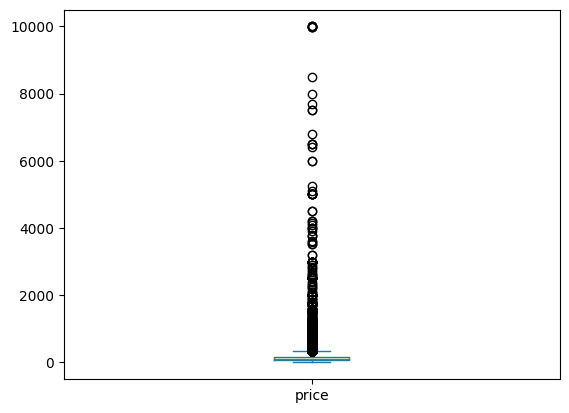

In [23]:
db_dropped['price'].plot.box()

<AxesSubplot: ylabel='Frequency'>

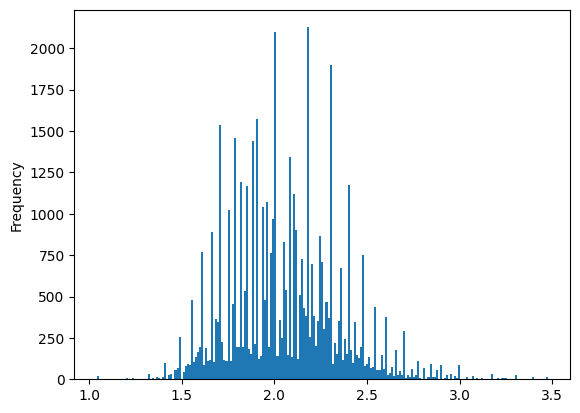

In [24]:
(
    db_dropped['price']
    [(db_dropped['price'] > 10**0.5) & (db_dropped['price'] < 10**3.5)]
    .apply(lambda x: np.log10(x+1))
    .plot.hist(bins=221)
)

<AxesSubplot: >

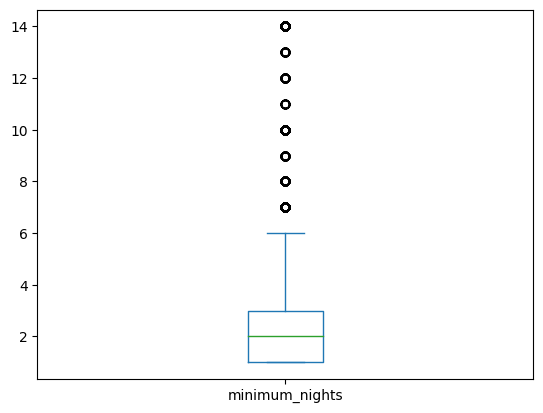

In [25]:
# Outlier
db_dropped[db_dropped['minimum_nights'] < 15]['minimum_nights'].plot.box()

# db_dropped = db_dropped[(db_dropped['minimum_nights'] > 0) & (db_dropped['minimum_nights'] < 15)]

<AxesSubplot: ylabel='Frequency'>

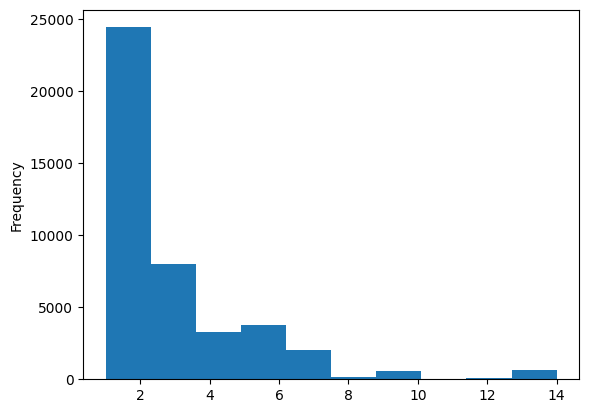

In [26]:
# Outlier
db_dropped[db_dropped['minimum_nights'] < 15]['minimum_nights'].plot.hist()

# db_dropped = db_dropped[(db_dropped['minimum_nights'] > 0) & (db_dropped['minimum_nights'] < 15)]

<AxesSubplot: >

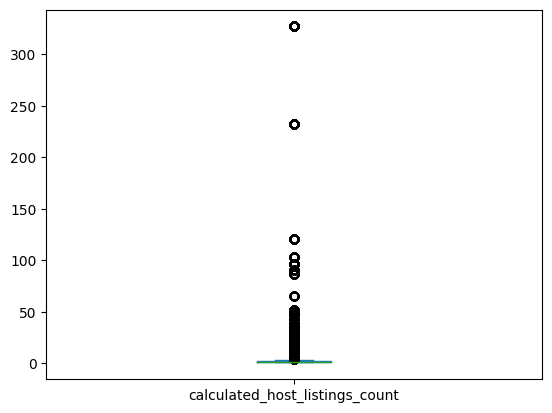

In [27]:
# O maior host tem 324 anúncios!
db_dropped["calculated_host_listings_count"].plot.box()

<AxesSubplot: ylabel='Frequency'>

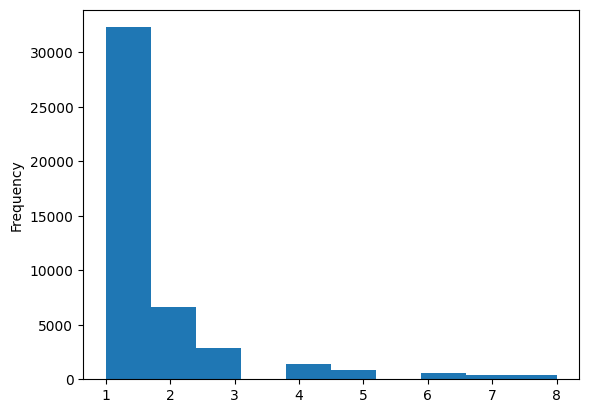

In [28]:
db_dropped[db_dropped["calculated_host_listings_count"] < 9]["calculated_host_listings_count"].plot.hist()

In [29]:
# Base de dados final
db_norm = db_dropped[
    (db_dropped['price'] > 10**0.5) & 
    (db_dropped['price'] < 10**3.5) & 
    (db_dropped['minimum_nights'] < 15) & 
    (db_dropped["calculated_host_listings_count"] < 9)
]
display(db_norm.head())

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Entire_home/apt,Private_room,Shared_room
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


----

# 4. Análise Exploratória

/var/folders/jl/6ry75trx7zl4hpwc_1qyhdtm0000gn/T/ipykernel_1975/3493572274.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(db_norm.corr(), vmin=-1, vmax=1, annot=True)


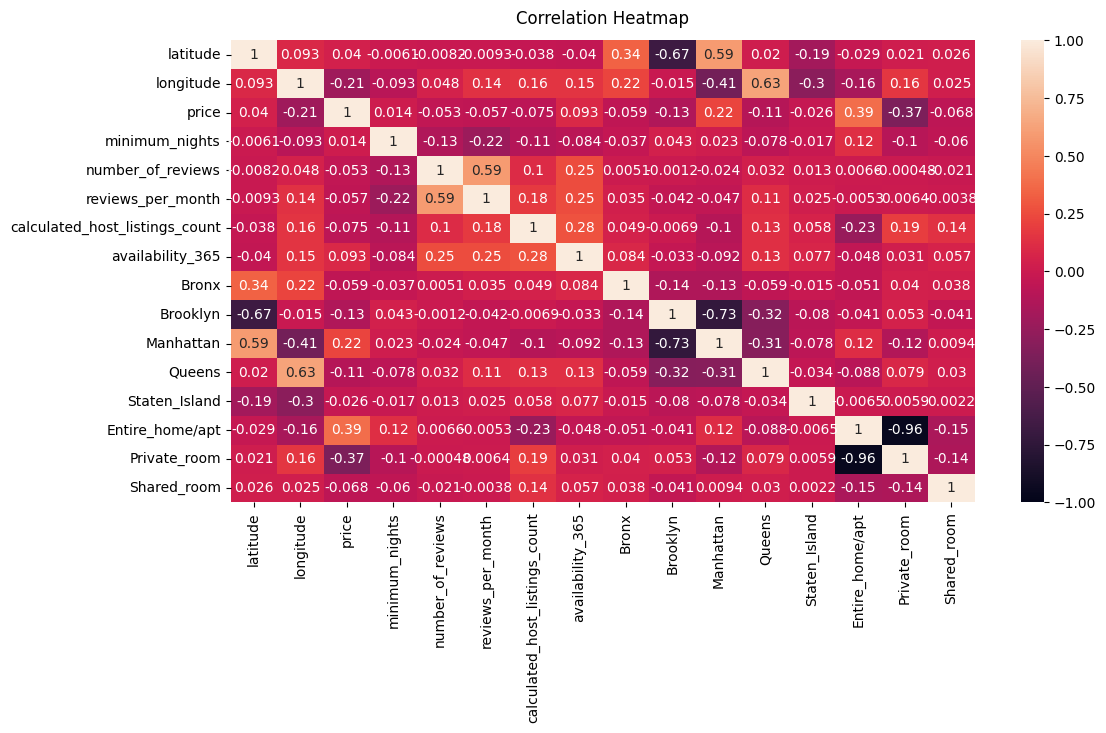

In [30]:
plt.figure(figsize=(12, 6))

heatmap = sns.heatmap(db_norm.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

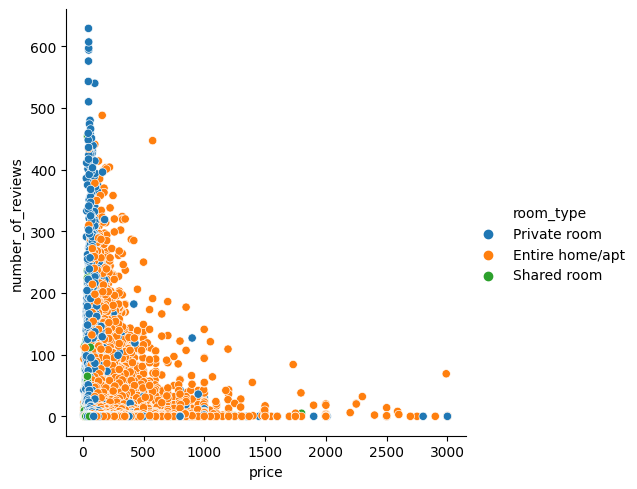

In [31]:
sns.relplot(data=db_norm, kind='scatter', x='price', y='number_of_reviews', hue='room_type');

In [32]:
top_10 = db_norm.nlargest(10,'number_of_reviews')
mean = top_10.price.mean()
print('Avg price per night: {}'.format(mean))

top_10[['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'number_of_reviews']]

Avg price per night: 65.4


,name,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
11759,Room near JFK Queen Bed,Queens,Jamaica,Private room,47.0,629
2031,Great Bedroom in Manhattan,Manhattan,Harlem,Private room,49.0,607
2030,Beautiful Bedroom in Manhattan,Manhattan,Harlem,Private room,49.0,597
2015,Private Bedroom in Manhattan,Manhattan,Harlem,Private room,49.0,594
13495,Room Near JFK Twin Beds,Queens,Jamaica,Private room,47.0,576
10623,Steps away from Laguardia airport,Queens,East Elmhurst,Private room,46.0,543
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,Manhattan,Lower East Side,Private room,99.0,540
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Queens,East Elmhurst,Private room,48.0,510
4870,Private brownstone studio Brooklyn,Brooklyn,Park Slope,Entire home/apt,160.0,488
471,LG Private Room/Family Friendly,Brooklyn,Bushwick,Private room,60.0,480


In [33]:
db_norm['neighbourhood'].value_counts()[:10]

Williamsburg          3606
Bedford-Stuyvesant    3261
Harlem                2392
Bushwick              2194
East Village          1670
Upper West Side       1540
Hell's Kitchen        1498
Crown Heights         1413
Upper East Side       1403
East Harlem           1008
Name: neighbourhood, dtype: int64

In [34]:
db_norm[
    (db_norm['neighbourhood'] == "Bushwick") | 
    (db_norm['neighbourhood'] == "East Harlem") |
    (db_norm['neighbourhood'] == "Williamsburg") |
    (db_norm['neighbourhood'] == "East Village")
][['neighbourhood', 'price']]

,neighbourhood,price
4,East Harlem,80.0
15,Williamsburg,140.0
19,East Harlem,190.0
20,Williamsburg,299.0
29,East Village,180.0
...,...,...
48883,East Harlem,75.0
48884,Williamsburg,190.0
48885,East Harlem,75.0
48887,Williamsburg,170.0


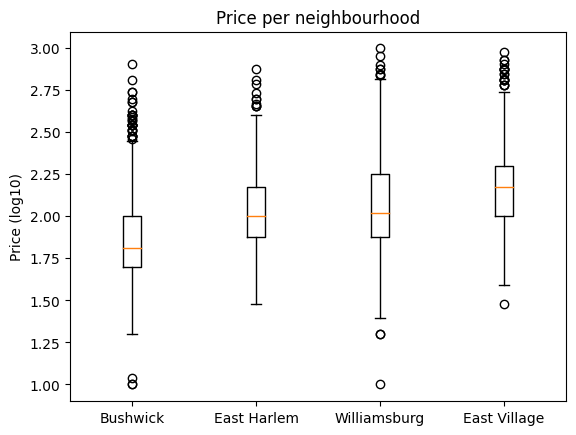

In [35]:
fig, ax = plt.subplots()

neighbourhoods = ['Bushwick', 'East Harlem', 'Williamsburg', 'East Village']

for i in range(len(neighbourhoods)):
    ax.boxplot(
        db_norm[
            (db_norm['neighbourhood'] == neighbourhoods[i])
            & (db_norm['price'] < 1e3)
        ]['price']
        .apply(np.log10),
        positions=[i]
    )

ax.set_xticklabels(neighbourhoods)
ax.set_ylabel('Price (log10)')
ax.set_title('Price per neighbourhood');

In [36]:
dict_neigh = {}
for i in range(len(neighbourhoods)):
    dict_neigh[neighbourhoods[i]] = db_norm[(db_norm['neighbourhood'] == neighbourhoods[i]) & (db_norm['price'] < 1e3)]['price'].mean()

dict_neigh

{'Bushwick': 85.64142335766424,
 'East Harlem': 124.15323383084578,
 'Williamsburg': 140.30628126737076,
 'East Village': 173.56156156156158}

In [37]:
n_listings = dict(db_norm.calculated_host_listings_count.value_counts())
n_listings_per_host = n_listings.keys()
n_hosts = n_listings.values()

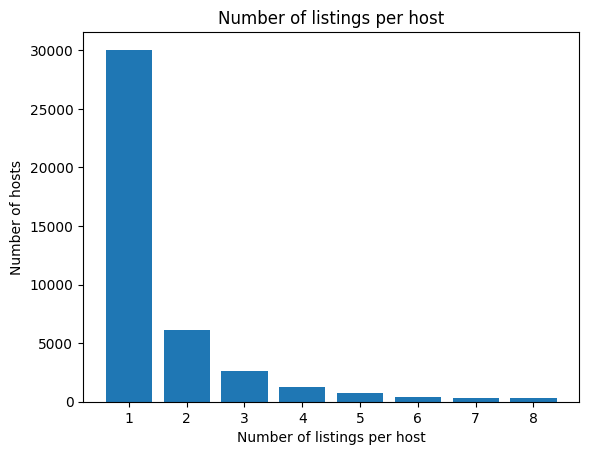

In [38]:
plt.bar(n_listings_per_host, n_hosts)
plt.xlabel('Number of listings per host')
plt.ylabel('Number of hosts')
plt.title('Number of listings per host');

In [39]:
for n in n_listings_per_host:
    print(f'Average price for {n} listings per host: {db_norm[db_norm["calculated_host_listings_count"] == n]["price"].mean()}')

Average price for 1 listings per host: 152.61524893503727
Average price for 2 listings per host: 123.58066091486245
Average price for 3 listings per host: 121.61866359447005
Average price for 4 listings per host: 122.10951239008793
Average price for 5 listings per host: 123.69348127600554
Average price for 6 listings per host: 130.96055684454757
Average price for 7 listings per host: 103.46728971962617
Average price for 8 listings per host: 104.2346570397112


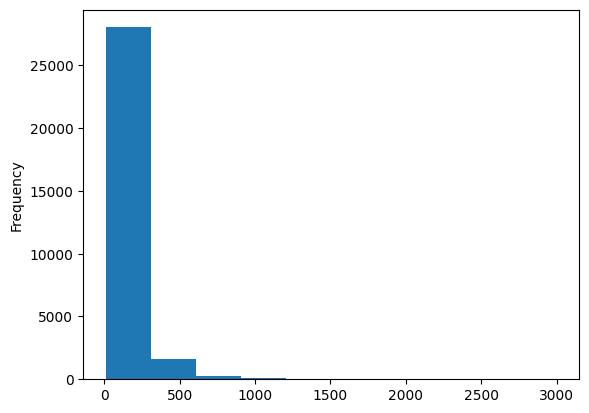

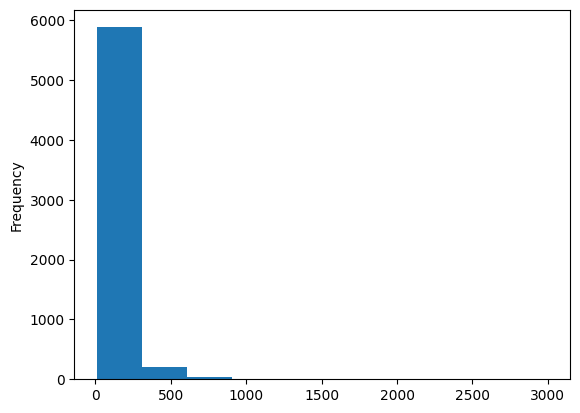

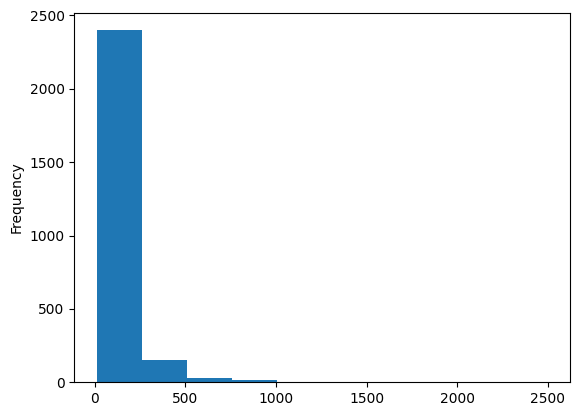

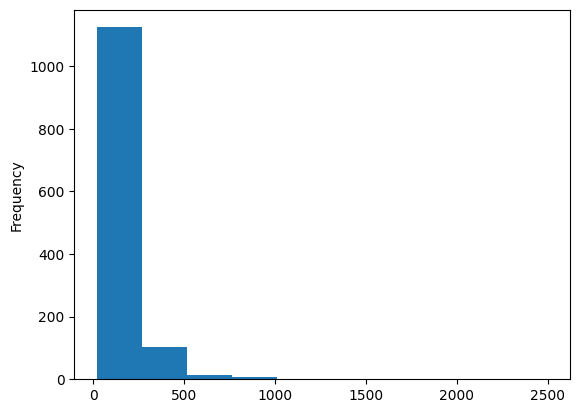

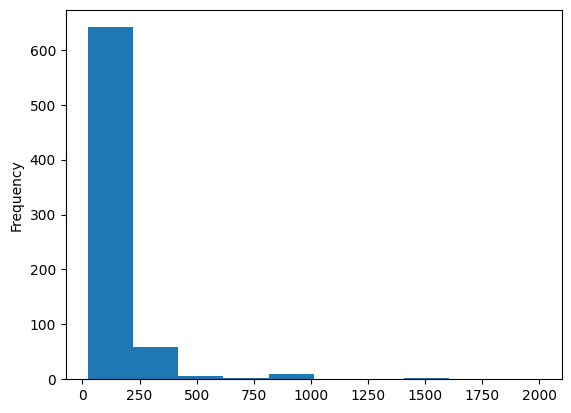

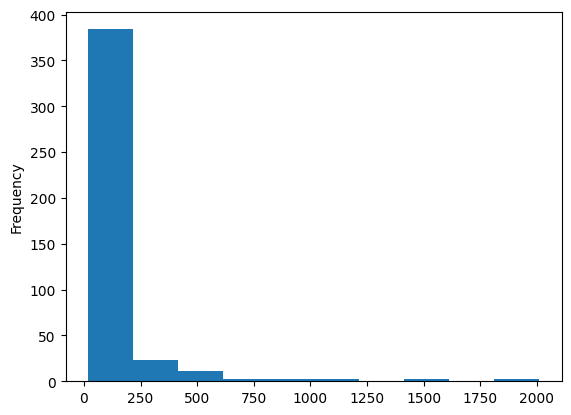

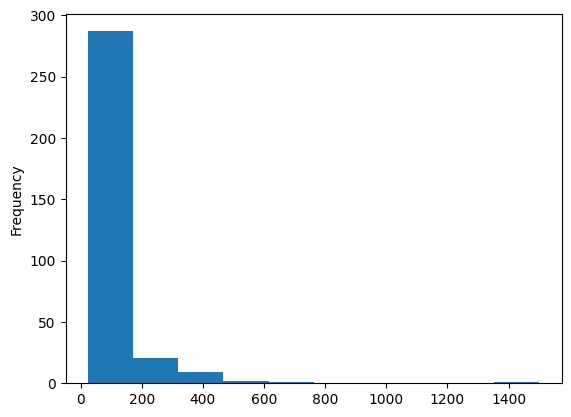

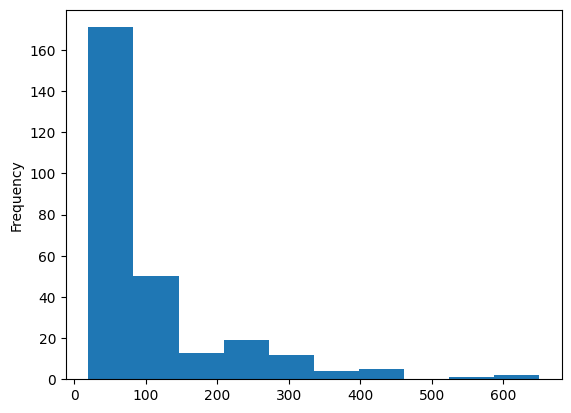

In [40]:
for n in n_listings_per_host:
    db_norm[db_norm["calculated_host_listings_count"] == n]["price"].plot.hist()
    plt.show()

In [41]:
for n in n_listings_per_host:
    print(f'{n} listings/host: ${round(db_norm[db_norm["calculated_host_listings_count"] == n]["price"].mean(), 2)}')

1 listings/host: $152.62
2 listings/host: $123.58
3 listings/host: $121.62
4 listings/host: $122.11
5 listings/host: $123.69
6 listings/host: $130.96
7 listings/host: $103.47
8 listings/host: $104.23


Em Nova Iorque, o preço para se comprar um imóvel é elevado, então, quanto mais propriedades um *host* tem, maior a probabilidade de serem de menor custo, implicando em um preço médio mais baixo de *hosts* com mais listagens.

## Análise de palavras chave nos anúncios 

In [101]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure

def word_cloud(words):
    # Create stopword list:
    stopwords = set(STOPWORDS)

    # Start with one review:
    text = " ".join(review for review in words)
    
    # Add custom word exlusions
    stopwords.update(["guidelines", "implemented", "access", "Average", "near","room", 'one', "Location", "Best",'Apt', 'stop', 'Full', 'NY','Gem', 'Chic'])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 1200, height = 800, background_color ='white', collocations=False, stopwords=stopwords).generate_from_text(text)

    # Display the generated image:
    figure(figsize=(8, 6), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

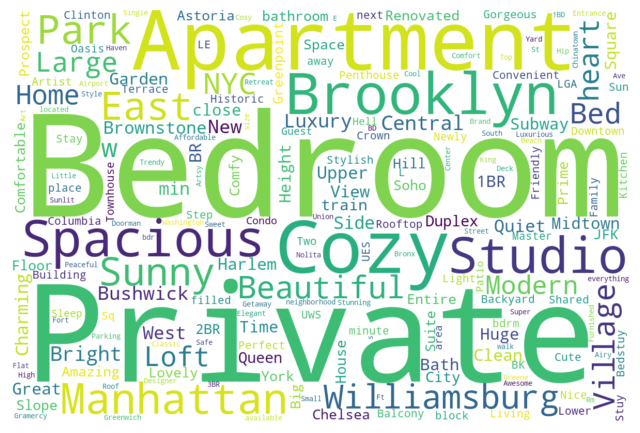

In [102]:
word_cloud(db_norm.name)

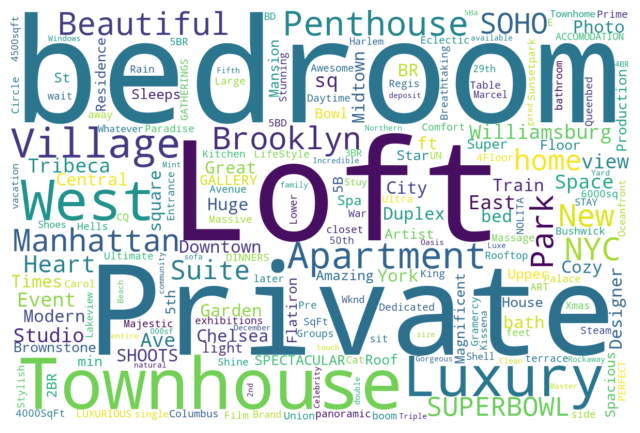

In [103]:
top_100_price = db_norm.nlargest(100,'price')
word_cloud(top_100_price.name)
# word_cloud(db_norm.name)

In [110]:
words = ['Townhouse', 'Loft', 'Private', 'Penthouse', 'Luxury', 'SUPERBOWL']
def expensive_words(name):
    for word in words:
        if word in name:
            return 1
    return 0

db_norm_name = db_norm['name']
db_norm_exp = db_norm_name.map(expensive_words).rename("expensive")

In [112]:
db_norm = db_norm.join(db_norm_exp)
db_norm.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,...,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Entire_home/apt,Private_room,Shared_room,expensive
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,...,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,...,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,...,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,...,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


## Regressão inicial

In [113]:
db_norm.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten_Island', 'Entire_home/apt', 'Private_room', 'Shared_room',
       'expensive'],
      dtype='object')

In [114]:
# Features
X = db_norm[[
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count', 
    'availability_365',
    'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten_Island',
    'Entire_home/apt', 'Private_room', 'Shared_room',
    'expensive'
]]

# Target
Y = db_norm['price']

# Randomizador
RANDOM_SEED = 42

# Temos também o split de validação 
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=RANDOM_SEED)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,
    random_state=RANDOM_SEED)

In [115]:
# Fit do modelo
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
# Sumário
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     585.7
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:28:40   Log-Likelihood:            -1.5793e+05
No. Observations:               25077   AIC:                         3.159e+05
Df Residuals:                   25064   BIC:                         3.160e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
minimum_nigh

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'erro = {round(RMSE, 2)}')

erro = 127.99


In [117]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)

lin_poly_reg = LinearRegression()
lin_poly_reg.fit(X_train_poly, y_train)
y_pred_poly = lin_poly_reg.predict(X_val_poly)


In [118]:
RMSE = np.sqrt(mean_squared_error(y_val, y_pred_poly))
print(f'erro = {round(RMSE, 2)}')

erro = 1620.42


In [119]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_dec = tree_reg.predict(X_val)
RMSE = mean_squared_error(y_val, y_pred_dec)
print(f'erro = {round(RMSE, 2)}')

erro = 30020.53


In [120]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=RANDOM_SEED)

forest_reg.fit(X_train, y_train)

y_pred_forest = forest_reg.predict(X_val)
RMSE = np.sqrt(mean_squared_error(y_val, y_pred_forest))
print(f'erro = {round(RMSE, 2)}')

erro = 134.82


In [121]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=0, n_estimators=120, min_samples_split=70)

GBR.fit(X_train, y_train)

y_pred_gbr = GBR.predict(X_val)
RMSE = np.sqrt(mean_squared_error(y_val, y_pred_gbr))
print(f'erro = {round(RMSE, 2)}')

erro = 123.55


# Ideias de análise

- 1. Análise do modo como o nome do anúncio é feito

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

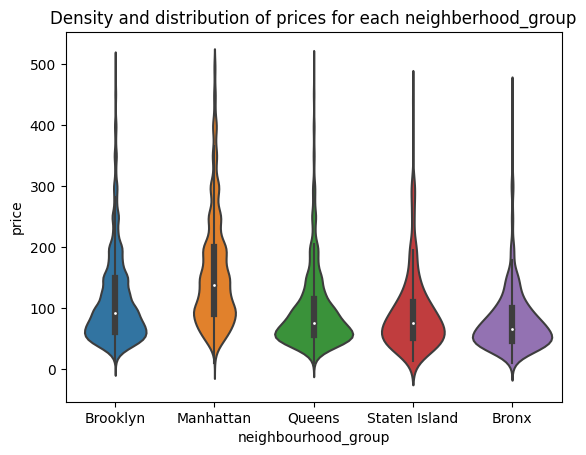

In [121]:
sub_6 = db_norm[db_norm.price < 500]
viz_2=sns.violinplot(data=sub_6, x="neighbourhood_group", y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

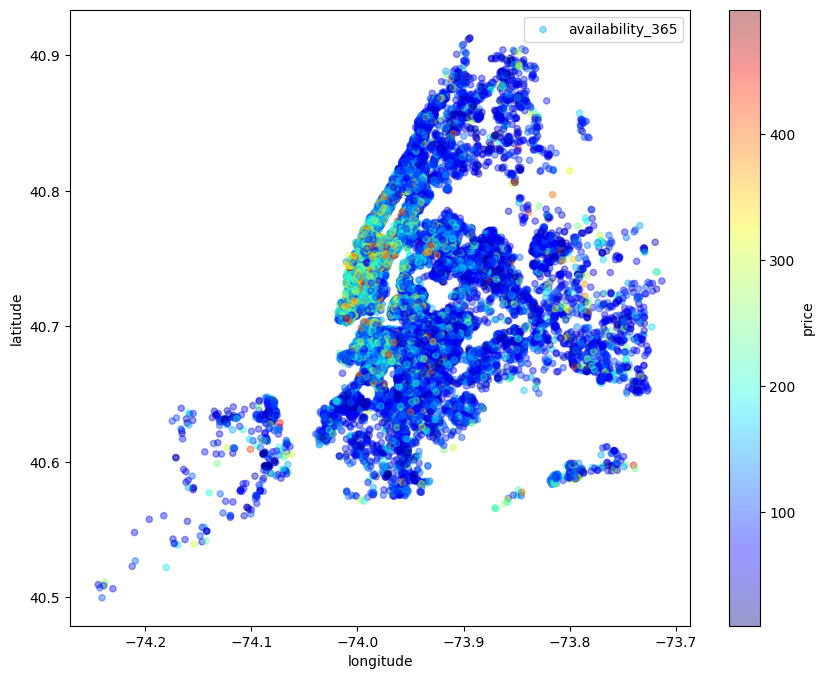

In [123]:
sub_6 = db_norm[db_norm.price < 500]
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

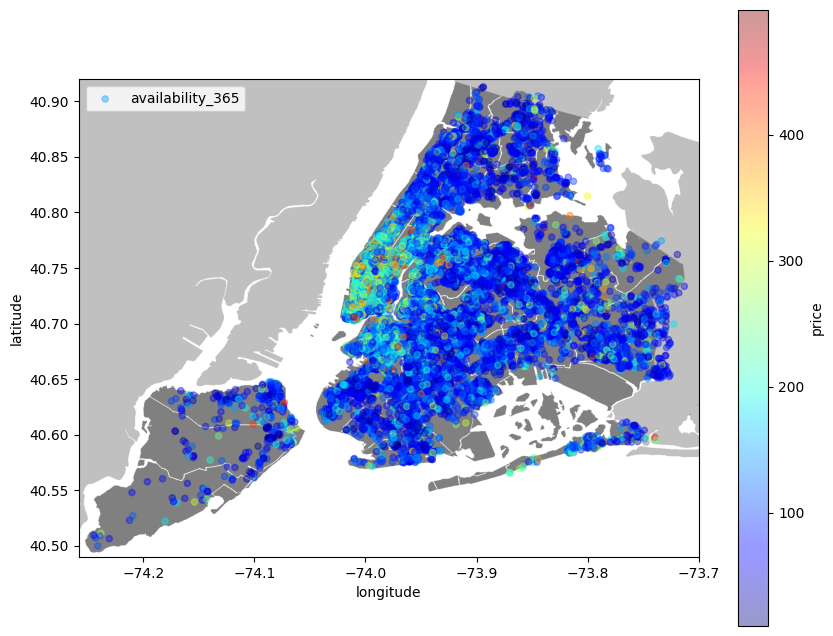

In [124]:
plt.figure(figsize=(10,8))


nyc_img=plt.imread('Neighbourhoods_New_York_City_Map.PNG')
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
              cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)


plt.legend()
plt.show()

## Referências

-  https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb/notebook
-  https://www.datacamp.com/tutorial/wordcloud-python